<h1 align=center><font size = 5>ANÁLISIS DOSIMETRIA DE ANILLO EN RADIOFARMACIA</font></h1>

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Para cargar los datos
data= pd.read_csv('DATOSRF.txt', delim_whitespace =True)

#para ver los primeros datos
data.head()

,Mes,MD,MND,Ano,Persona,Ocupacion
0,Enero,M,M,2019,Javier,QF
1,Febrero,M,M,2019,Javier,QF
2,Marzo,M,M,2019,Javier,QF
3,Abril,2.59,2.31,2019,Javier,QF
4,Mayo,0.7,1.64,2019,Javier,QF


<h1 id="basic_insight">Basic Insight of Dataset</h1>

<h2>Data Types</h2>

In [2]:
## Tipos de datos
data.dtypes

Mes          object
MD           object
MND          object
Ano           int64
Persona      object
Ocupacion    object
dtype: object

Cambiar el tipo de dato en Mano Dominante (MD) y Mano No-Dominante (MND), es requerido para realizar operaciones numericas.

<h2>Describe</h2>
Resumen estadístico de cada columna

In [3]:
data.describe(include = "all")

,Mes,MD,MND,Ano,Persona,Ocupacion
count,920,913,730,920.000000,920,755
unique,12,320,306,NaN,29,4
top,Diciembre,M,M,NaN,Nidia,QF
freq,86,241,145,NaN,105,497
mean,NaN,NaN,NaN,2015.904348,NaN,NaN
std,NaN,NaN,NaN,2.365324,NaN,NaN
min,NaN,NaN,NaN,2011.000000,NaN,NaN
25%,NaN,NaN,NaN,2014.000000,NaN,NaN
50%,NaN,NaN,NaN,2016.000000,NaN,NaN
75%,NaN,NaN,NaN,2018.000000,NaN,NaN


NaN es Not a Number

<h2>Info</h2>
Información del data

In [4]:
#data.info

[920 rows x 6 columns], 920 filas y 6 columnas

<h1 id="Wrangling">Data Wrangling</h1>

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

La dosimetría de doble anillo fue implementada a partir de Octubre de 2012 en el servicio de Radio-Farmacia del Instituto Nacional de Cancerología. Datos con NA, correponden a persona ocupacionalmente expuesta con solo un anillo. Datos con NP, correponden a dosímetro de anillo no presentado. Datos con M, correponden a dosis no Detectable, por debajo del umbral de medición de 0.01 mSv. Estos datos son convertidos en 0 y en NaN (Not a number), para poder realizar operaciones numericas con los datos. 

<h4>Convert M to 0.0</h4>

In [5]:
# replace M to 0.0
data.replace("M", 0.0, inplace = True)

<h4>Convert NA y NP to NaN</h4>

In [6]:
# replace NA to NaN
data.replace("NA", np.nan, inplace = True)
# replace NP to NaN
data.replace("NP", np.nan, inplace = True)

Datos de los años 2011 y 2012 no se tomaran en consideración pues no estaba implementada la dosimetría de doble anillo, y por lo tanto no se pueden realizar comparaciones entre las dosis en las manos. La ventana de estudio es desde Enero de 2013 a Diciembre de 2019 

In [7]:
#replace 2011 to NaN
data["Ano"].replace(2011, np.nan, inplace = True)
#replace 2012 to NaN
data["Ano"].replace(2012, np.nan, inplace = True)

In [8]:
# simply drop whole rows with NaN in "Ano" column
data.dropna(subset=["Ano"], axis=0, inplace=True)

In [9]:
# reset index, because we droped the rows of 2011 and 2012
data.reset_index(drop=True, inplace=True)

In [10]:
#Evaluando Missing Data
#missing_data = data.isnull()
#missing_data.tail(5)
#Contar missing values por columnas
#for column in missing_data.columns.values.tolist():
    #print(column)
    #print (missing_data[column].value_counts())
    #print("")   

<h3> Correct data format</h3>

Se cambia el tipo de dato en las columnas MD, MND y Ano

In [11]:
data[["MD"]] = data[["MD"]].astype("float")
data[["MND"]] = data[["MND"]].astype("float")
data[["Ano"]] = data[["Ano"]].astype("int")
data.dtypes

Mes           object
MD           float64
MND          float64
Ano            int64
Persona       object
Ocupacion     object
dtype: object

In [12]:
#data["Persona"].value_counts()

<h1 id="#Filtro_ocupacion">Filtro por Ocupación</h1>

### Tc-99m Technologist

In [13]:
#listTC = data['Ocupacion']=='TC'
#data = data[listTC]

### Quality Control

In [14]:
#listQC = data['Ocupacion']=='QC'
#data = data[listQC]

### Cyclotron

In [15]:
#listCIC = data['Ocupacion']=='CIC'
#data = data[listCIC]

### Pharmaceutical Chemist

In [16]:
#listQF = data['Ocupacion']=='QF'
#data = data[listQF]

<h1 id="#Historico">Histórico</h1>

Promedio_value, calcula el promedio por mes (por fila) entre las dos manos. Max_value, calcula el máximo por mes (por fila) entre las dos manos. df_group_ano, suma todos los datos por año (y por columna).

In [17]:
#promedio_value=data[["MD", "MND"]].mean(axis=1)
#data['promedio']= promedio_value

max_value=data[["MD", "MND"]].max(axis=1)
data['max_value']= max_value

df_group_ano = data.groupby('Ano', as_index=False).mean()
dat_group_ano = data.groupby(['Ano'],as_index=False)
df_group_ano

,Ano,MD,MND,max_value
0,2013,3.330000,4.022388,4.265000
1,2014,5.038652,5.370132,5.744270
2,2015,6.467347,7.085581,7.590816
3,2016,5.088393,7.041573,6.020536
4,2017,4.078777,5.200088,4.922746
5,2018,2.183099,2.462339,2.565423
6,2019,1.977958,2.073143,2.269247


In [18]:
data["Ano"].value_counts()

2019    147
2018    145
2017    142
2016    114
2015     99
2014     91
2013     81
Name: Ano, dtype: int64

In [19]:
sns.set_context("talk",font_scale=1.4)

Text(0,0.5,'Dose [mSv]')

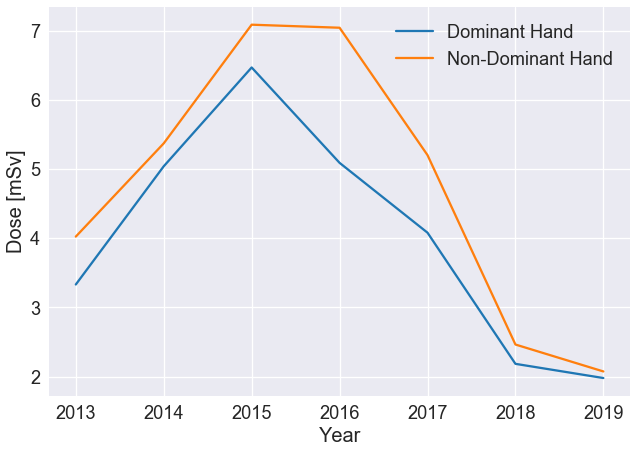

In [20]:
plt.plot(df_group_ano['Ano'],df_group_ano['MD'], color='tab:blue', label='Dominant Hand')
plt.plot(df_group_ano['Ano'],df_group_ano['MND'], color='tab:orange',label='Non-Dominant Hand')
plt.legend()
#plt.title('All Staff')
plt.xlabel('Year')
plt.ylabel('Dose [mSv]')
#plt.savefig('todosmean.pdf')

In [21]:
##Histórico de exposición de extremidades discriminado por año y por Mano 


#labels = [2013, 2014, 2015, 2016, 2017, 2018, 2019]


#x = np.arange(len(labels))  # the label locations
#width = 0.45  # the width of the bars

#fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, df_group_ano['MD'], width, color='tab:blue', label='Dominant hand')
#rects2 = ax.bar(x + width/2, df_group_ano['MND'], width, color='tab:orange', label='Non-Dominant hand')

#ax.set_ylabel('Dose [mSv]')
#ax.set_title('All staff')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
#ax.legend(loc='upper left')


#def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
    #for rect in rects:
        #height = rect.get_height()
        #ax.annotate('{:0.2f}'.format(height),
                    #xy=(rect.get_x() + rect.get_width() / 2, height),
                    #xytext=(0, 3),  # 3 points vertical offset
                    #textcoords="offset points",
                    #ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)



<h4> Limpieza Datos 1</h4>

Si los datos por mes de ambas manos son M, se eliminan estas filas porque no aportan información que permita realizar comparaciones. Datos como NP ó NA, también son eliminados

In [22]:
# replace 0.0 to NaN
data['max_value'].replace(0.0, np.nan, inplace = True)

In [23]:
# simply drop whole row with NaN in "max_value" column
data.dropna(subset=["max_value"], axis=0, inplace=True)
# simply drop whole row with NaN in "MD" or "MND"column
data.dropna(subset=["MD"], axis=0, inplace=True)
data.dropna(subset=["MND"], axis=0, inplace=True)

In [24]:
# reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [25]:
data["Ano"].value_counts()

2018    107
2019    106
2017     94
2015     76
2014     72
2016     63
2013     52
Name: Ano, dtype: int64

### Histograma Dosis: Mano Dominante y Mano No Dominante

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

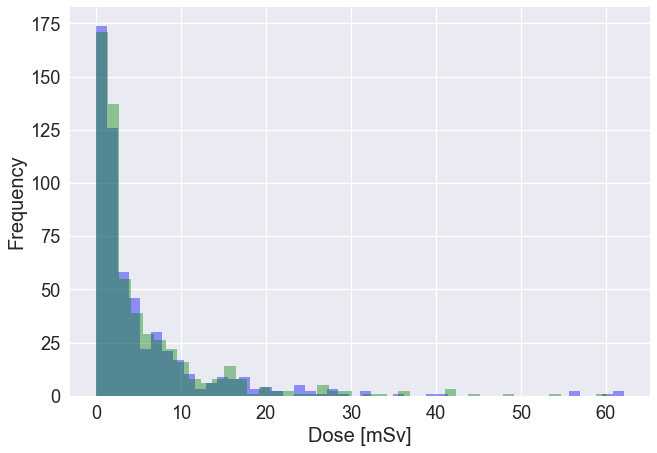

In [31]:
sns.distplot(data['MD'],kde=False,color='b')
#bins=10  hist=False
sns.distplot(data['MND'],kde=False,color='g')
plt.xlabel('Dose [mSv]')
plt.ylabel('Frequency')

<h1 id="#Normalizacion">Data Normalization</h1>
<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

add original value by (original value)/(maximum value)

\begin{equation}
\frac{\text{Original Value}}{\text{Max_Value}}
\end{equation}

In [32]:
# Normalizacion mano Dominante
NMD = data["MD"]/data["max_value"]
data['NMD']= NMD

# Normalizacion mano No Dominante
NMND = data["MND"]/data["max_value"]
data['NMND']= NMND

In [ ]:
#data

####  570 pares de datos en total (Enero 2013-Diciembre 2019)

<h3 id="Frecuencia">Frecuencia Dosis Máxima</h3>

In [33]:
## Mano Dominante
#data['NMD'].value_counts()

#### Mano Dominante 268

In [ ]:
## Mano No dominante
#data['NMND'].value_counts()

#### Mano No-Dominante 323

\begin{equation}
(323+268)-570\\
591-570= 21\\
MD==MND =21
\end{equation}

Frecuencia Mano No-dominante: 323-21=302. Frecuencia Mano Dominante: 268-21=247 

Eliminar datos M -> 0. 

<h4> Limpieza Datos 2</h4>

In [34]:
# replace 0.0 to NaN
data['MD'].replace(0.0, np.nan, inplace = True)
data['MND'].replace(0.0, np.nan, inplace = True)

In [35]:
# simply drop whole row with NaN in "MD" or "MND"column
data.dropna(subset=["MD"], axis=0, inplace=True)
data.dropna(subset=["MND"], axis=0, inplace=True)

In [36]:
# reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [37]:
#data["Persona"].value_counts()

In [38]:
#data["Ano"].value_counts()

In [39]:
data[['NMD','NMND']].describe()

,NMD,NMND
count,535.000000,535.000000
mean,0.846630,0.874012
std,0.199289,0.204837
min,0.068807,0.023636
25%,0.727922,0.800000
50%,0.936508,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


<h3 id="#desviacion">Desviación Dosis Máxima</h3>

\begin{equation}
100-\frac{\text{Original Value}}{\text{Max_Value}}\times 100
\end{equation}

In [40]:
# Mano Dominante
pMD = 100-(data["NMD"]*100)
data['pMD']= pMD

# Mano No Dominante
pMND = 100-(data["NMND"]*100)
data['pMND']= pMND

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


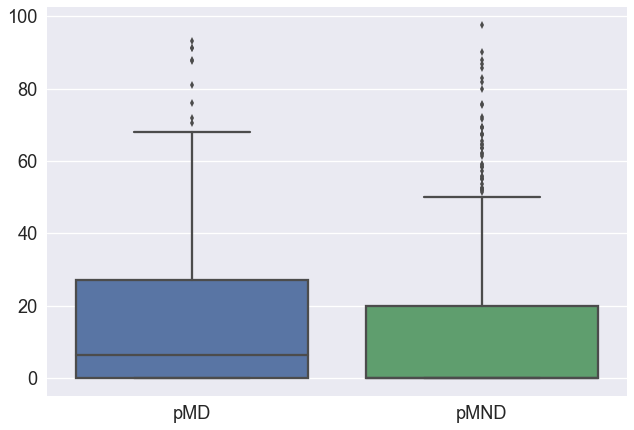

In [41]:
# Mano Dominante - Mano No Dominante
sns.boxplot(data[['pMD','pMND']])
#sns.boxplot(pMD)

In [42]:
data[['pMD','pMND']].describe()

,pMD,pMND
count,535.000000,535.000000
mean,15.336971,12.598772
std,19.928934,20.483677
min,0.000000,0.000000
25%,0.000000,0.000000
50%,6.349206,0.000000
75%,27.207792,20.000000
max,93.119266,97.636364


<h3 id="#resta">Resta-Absoluto</h3> 

Por convención se realiza la siguiente resta entre los valores normalizados de dosis:

\begin{equation}
MND-MD
\end{equation}

In [43]:
### Resta
Resta=data["NMND"]-data["NMD"]
data['Resta']=Resta

### Absoluto
absoluto= data['Resta'].abs()
data['absoluto']=absoluto

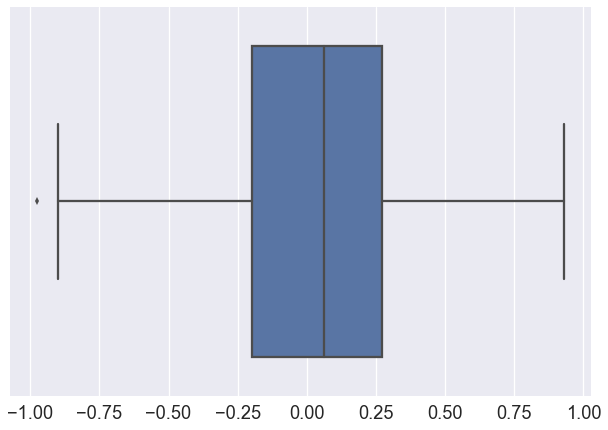

In [44]:
sns.boxplot(Resta)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

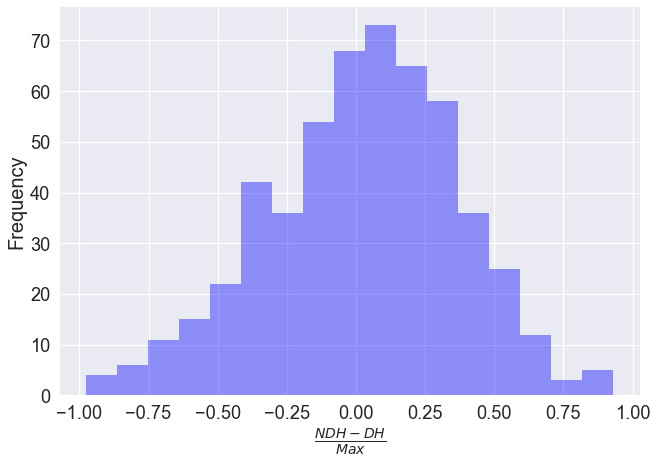

In [45]:
sns.distplot(data['Resta'],kde=False,color='b')
plt.xlabel(r'$\frac{NDH-DH}{Max}$')
plt.ylabel('Frequency')
#plt.savefig('histog.pdf')

Text(0.5,0,'Absolute')

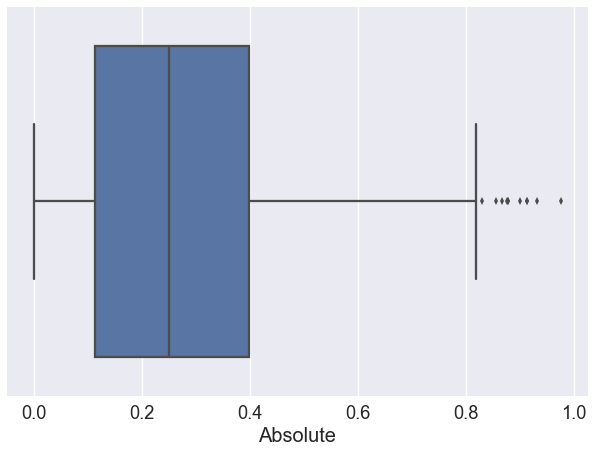

In [46]:
sns.boxplot(absoluto)
plt.xlabel('Absolute')

In [47]:
data[['Resta','absoluto']].describe()

,Resta,absoluto
count,535.000000,535.000000
mean,0.027382,0.279357
std,0.346976,0.207260
min,-0.976364,0.000000
25%,-0.200000,0.114395
50%,0.063492,0.250000
75%,0.272078,0.397780
max,0.931193,0.976364


<h3 id="#under">Underestimate (Oramed)</h3> 

\begin{equation}
\frac{\text{Max_value}}{\text{Value}(MD-\text{or}-MND)}
\end{equation}

In [48]:
# Mano Dominante
UMD = data["max_value"]/ data["MD"]
data['UMD']= UMD

# Mano No Dominante
UMND = data["max_value"]/data["MND"]
data['UMND']= UMND

In [49]:
data[['UMD','UMND']].describe()

,UMD,UMND
count,535.000000,535.000000
mean,1.351613,1.372270
std,1.047081,1.955803
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.067797,1.000000
75%,1.373775,1.250000
max,14.533333,42.307692


<h1 id="#Exploratory">Exploratory Data Analysis</h1>

### Correlation
<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<b>Pearson Correlation</b>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [50]:
data[["NMD", "NMND"]].corr()

,NMD,NMND
NMD,1.000000,-0.474229
NMND,-0.474229,1.000000


In [51]:
data[["pMD", "pMND"]].corr()

,pMD,pMND
pMD,1.000000,-0.474229
pMND,-0.474229,1.000000


In [52]:
data[["MD", "MND"]].corr()

,MD,MND
MD,1.000000,0.843022
MND,0.843022,1.000000


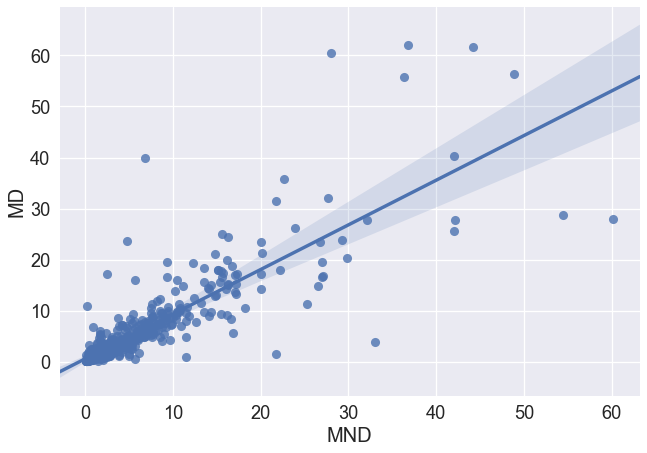

In [53]:
# Non Dominant Hand as potential predictor variable of Dominant Hand
sns.regplot(x="MND", y="MD", data=data)
#plt.ylim(0,)

<p>As the Dose in Non-Dominant Hand goes up, the dose in Dominant hand goes up: this indicates a positive direct correlation between these two variables.</p>

 We can examine the correlation between 'MND' and 'MD' and see it's approximately  0.84

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 

In [54]:
from scipy import stats

In [55]:
pearson_coef, p_value = stats.pearsonr(data['MND'], data['MD'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.843021835895  with a P-value of P = 1.16744426487e-145


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between Non Dominant Hand and Dominant Hand is statistically significant, although the linear relationship is quite strong (~0.843)</p>

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


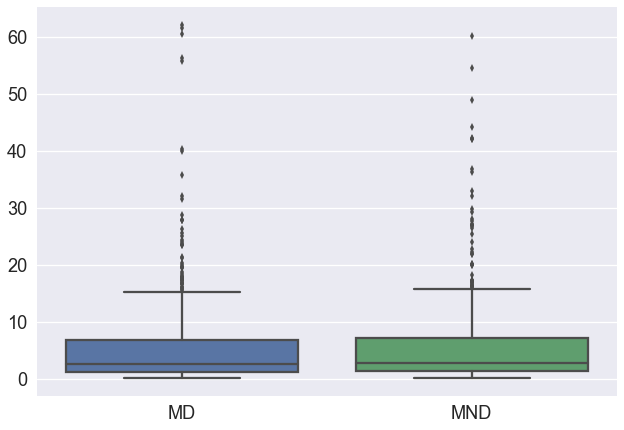

In [57]:
sns.boxplot(data[['MD','MND']])

<h1 id="#Modeldev">Model Development</h1>

<b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


<h3 id="#LinearR">Linear Regression</h3>

<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$



 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

In [58]:
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

/Users/Mila/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

For this example, we want to look at how Non Dominant Hand can help us predict Dominant Hand.
Using simple linear regression, we will create a linear function with "MND" as the predictor variable and the "MD" as the response variable.

In [59]:
X = data[['MND']]
Y = data['MD']

In [60]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [61]:
####Obtain a prediciton 
Yhat=lm.predict(X)

In [62]:
# Slope 
lm.coef_

array([ 0.87397521])

In [63]:
# Intercept
lm.intercept_

0.59788550921638617

$$
MD = 0.5978855 + 0.87397521* MND
$$

<h2 id="#Visualization">Visualization</h2>

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

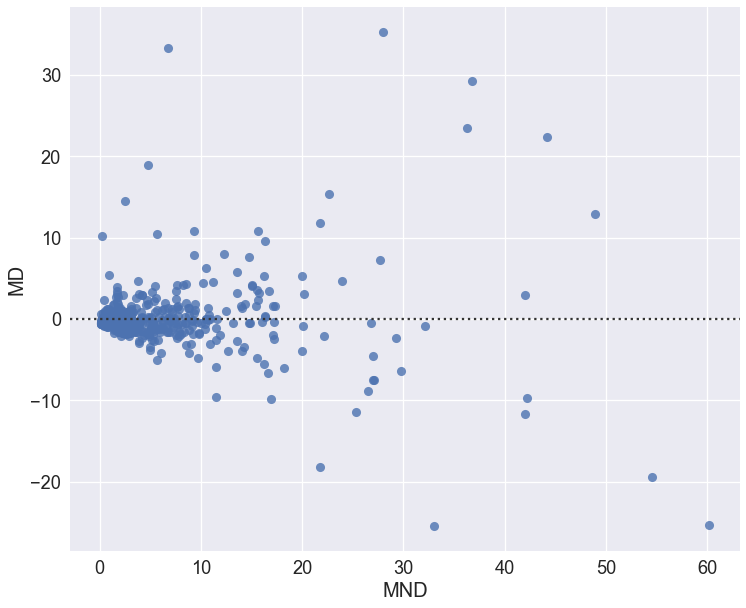

In [64]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['MND'], data['MD'])
#plt.show()

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

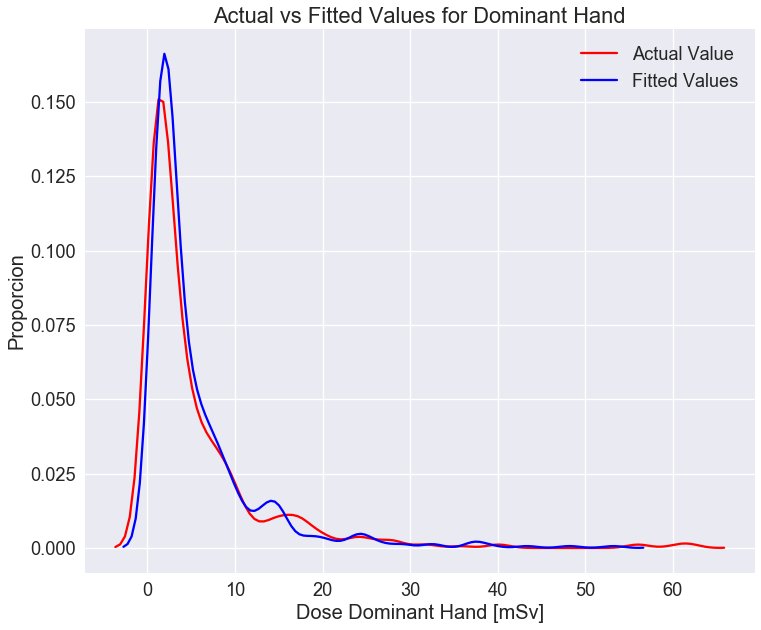

In [65]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(data['MD'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Dominant Hand')
plt.xlabel('Dose Dominant Hand [mSv]')
plt.ylabel('Proporcion')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

In [66]:
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.710685815796


We can say that ~ 71.069% of the variation of the Dominant Hand is explained by this simple linear model.

In [67]:
# Find the MSE
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results 

In [68]:
mse = mean_squared_error(data['MD'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  19.3124912825


<h1 id="#ModelEva">Model Evaluation</h1>

<h2 id="#TT">Training and testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>MD</b> in a separate dataframe <b>y</b>:</p>

In [69]:
y_data = data['MD']

drop MD data in x data

In [70]:
x_data=data.drop('MD',axis=1)

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [71]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 81
number of training samples: 454


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 214
number of training samples: 321


In [73]:
lre=LinearRegression()

In [74]:
lre.fit(x_train[['MND']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's Calculate the R^2 on the test data:

In [75]:
lre.score(x_test[['MND']], y_test)

0.6255028701906109

we can see the R^2 is much smaller using the test data.

In [76]:
lre.score(x_train[['MND']], y_train)

0.77171613967480313

<h2 id="#CrossVal">Cross Validation Score</h2>

Lets import <b>model_selection</b> from the module <b>cross_val_score</b>.

In [77]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case 'MND', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 

In [78]:
Rcross = cross_val_score(lre, x_data[['MND']], y_data, cv=4)

The default scoring is R^2; each element in the array has the average  R^2 value in the fold:

In [79]:
Rcross

array([ 0.54450879,  0.74255355,  0.65049276,  0.76597612])

 We can calculate the average and standard deviation of our estimate:

In [80]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.675882804136 and the standard deviation is 0.0872719603937


You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the function:

In [81]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature in this case <b>'MND'</b> , the target data <b>y_data</b>. The parameter 'cv' determines the number of folds; in this case 4. We can produce an output:

In [82]:
yhat = cross_val_predict(lre,x_data[['MND']], y_data,cv=4)
yhat[0:5]

array([ 2.49282415,  1.91047576,  1.88440046,  0.59801893,  1.70187335])

Text(0,0.5,'Proporcion')

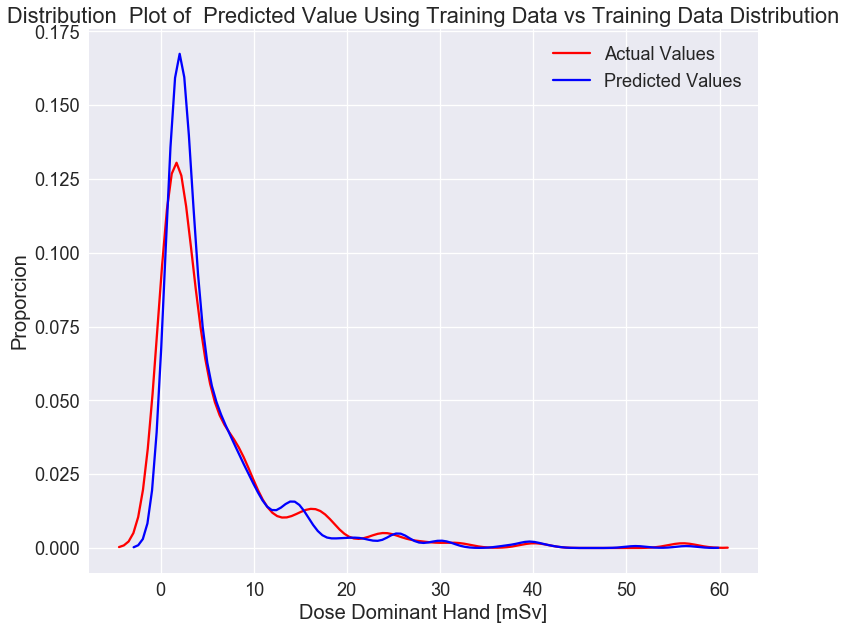

In [83]:
plt.figure(figsize=(width, height))
ax1= sns.distplot(y_train, hist=False, color="r", label="Actual Values")
sns.distplot(yhat, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Dose Dominant Hand [mSv]')
plt.ylabel('Proporcion')

In [84]:
yhat_train = lre.predict(x_train[['MND']])

In [85]:
yhat_test = lre.predict(x_test[['MND']])

Text(0,0.5,'Proporcion')

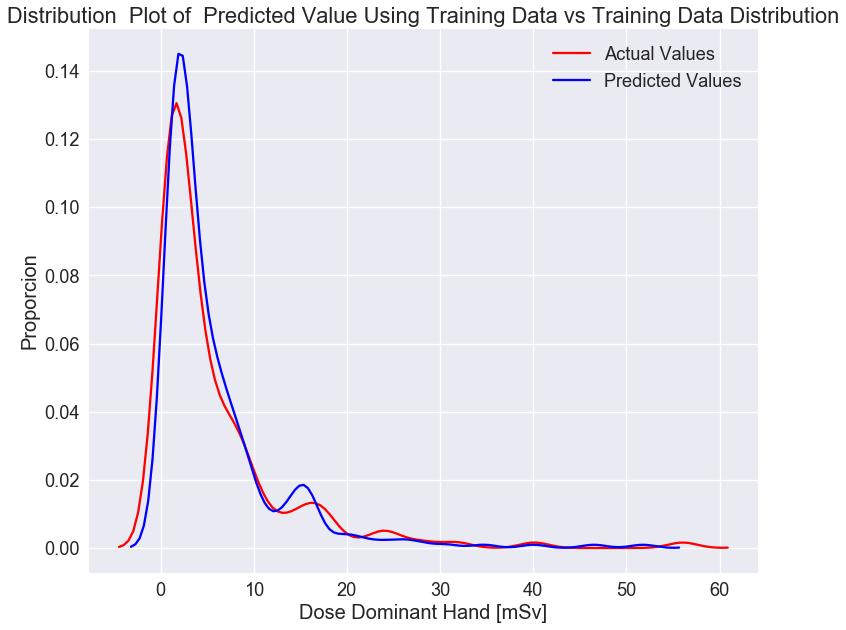

In [86]:
plt.figure(figsize=(width, height))
ax1= sns.distplot(y_train, hist=False, color="r", label="Actual Values")
sns.distplot(yhat_train, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Dose Dominant Hand [mSv]')
plt.ylabel('Proporcion')

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 

Text(0,0.5,'Proporcion')

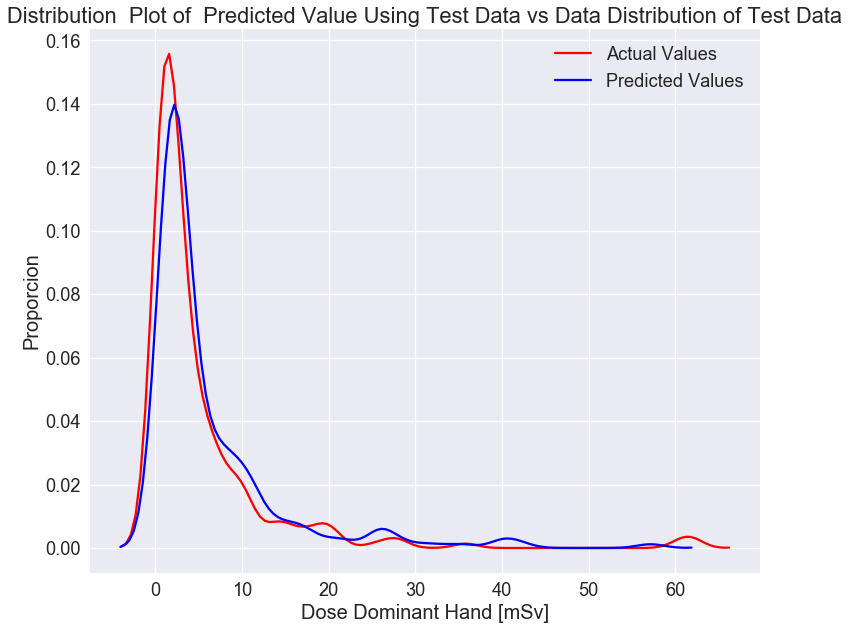

In [87]:
plt.figure(figsize=(width, height))
ax1= sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(yhat_test, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data')
plt.xlabel('Dose Dominant Hand [mSv]')
plt.ylabel('Proporcion')

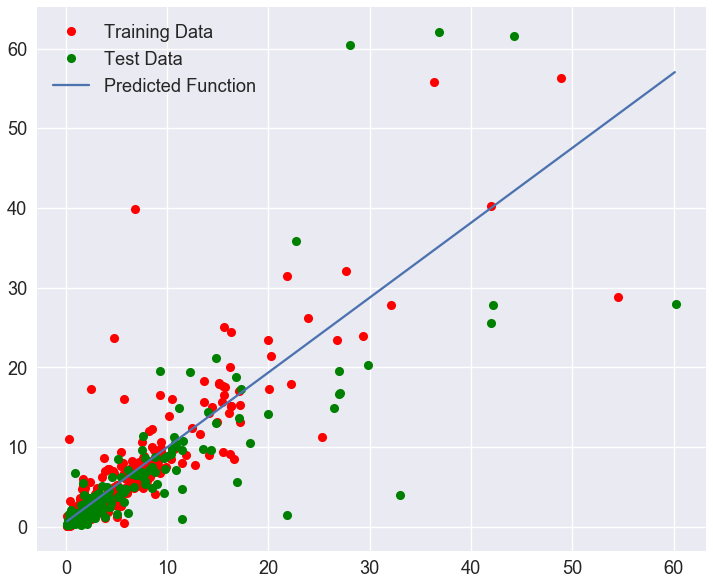

In [88]:
width = 12
height = 10
plt.figure(figsize=(width, height))
    
    
#training data 
#testing data 
# lr:  linear regression object 
#poly_transform:  polynomial transformation object 
 
xmax=max([x_train['MND'].values.max(), x_test['MND'].values.max()])
xmin=min([x_train['MND'].values.min(), x_test['MND'].values.min()])

x=np.arange(xmin, xmax, 0.1)


plt.plot(x_train['MND'], y_train, 'ro', label='Training Data')
plt.plot(x_test['MND'], y_test, 'go', label='Test Data')
plt.plot(x, lre.predict(x.reshape(-1, 1)), label='Predicted Function')
    #plt.ylim([-10000, 60000])
    #plt.ylabel('Price')
plt.legend()